In [60]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime 
from sklearn.linear_model import LinearRegression

In [ ]:
abs_path = os.path.abspath('lumberdata.csv')
df = pd.read_csv(abs_path)

In [106]:
df

,Date,Price,Open,High,Low,Vol.,Change %,TimeStamp
0,2023-01-06,354.0,359.50,359.50,349.00,0.13K,-0.03%,1.672963e+09
1,2023-01-05,354.1,359.50,361.80,352.10,0.17K,-1.78%,1.672877e+09
2,2023-01-04,360.5,366.00,370.00,360.50,0.14K,-0.83%,1.672790e+09
3,2023-01-03,363.5,370.20,370.20,362.00,0.12K,-1.94%,1.672704e+09
4,2023-01-01,370.7,370.70,370.70,370.70,NaN,-0.80%,1.672531e+09
...,...,...,...,...,...,...,...,...
767,2020-01-10,392.0,390.60,393.90,390.40,0.05K,0.23%,1.578614e+09
768,2020-01-09,391.1,400.10,401.60,387.30,0.09K,-1.73%,1.578528e+09
769,2020-01-08,398.0,395.40,402.90,394.00,0.13K,0.66%,1.578442e+09
770,2020-01-07,395.4,393.20,400.00,393.00,0.11K,-0.40%,1.578355e+09


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'])

In [ ]:
df['TimeStamp'] = df['Date'].apply(lambda x: x.timestamp())

In [ ]:
X = df[['TimeStamp']]
Y = df['Price']

In [67]:
split_ratio = .8
split_index = int(len(df) * split_ratio)

x_train , x_test = X[:split_index] , X[split_index:]
y_train , y_test = Y[:split_index] , Y[split_index:]

x_train

,TimeStamp
0,1.672963e+09
1,1.672877e+09
2,1.672790e+09
3,1.672704e+09
4,1.672531e+09
...,...
612,1.597882e+09
613,1.597795e+09
614,1.597709e+09
615,1.597622e+09


In [64]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
prediction_date = '2023-01-01'
prediction_datetime = datetime.datetime.strptime(prediction_date, '%Y-%m-%d')
datetime_to_timestamp = prediction_datetime.timestamp()

In [ ]:
prediction_input = np.array([[datetime_to_timestamp]])
prediction = model.predict(prediction_input)


In [104]:
df_with_prediction = df.copy()
df_with_prediction= df_with_prediction._append({'TimeStamp':datetime_to_timestamp,'Price':prediction[0]},ignore_index=True)

In [105]:
df_with_prediction['Date'] = df_with_prediction['TimeStamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df_with_prediction

,Date,Price,Open,High,Low,Vol.,Change %,TimeStamp
0,2023-01-06 03:30:00,354.000000,359.50,359.50,349.00,0.13K,-0.03%,1.672963e+09
1,2023-01-05 03:30:00,354.100000,359.50,361.80,352.10,0.17K,-1.78%,1.672877e+09
2,2023-01-04 03:30:00,360.500000,366.00,370.00,360.50,0.14K,-0.83%,1.672790e+09
3,2023-01-03 03:30:00,363.500000,370.20,370.20,362.00,0.12K,-1.94%,1.672704e+09
4,2023-01-01 03:30:00,370.700000,370.70,370.70,370.70,NaN,-0.80%,1.672531e+09
...,...,...,...,...,...,...,...,...
768,2020-01-09 03:30:00,391.100000,400.10,401.60,387.30,0.09K,-1.73%,1.578528e+09
769,2020-01-08 03:30:00,398.000000,395.40,402.90,394.00,0.13K,0.66%,1.578442e+09
770,2020-01-07 03:30:00,395.400000,393.20,400.00,393.00,0.11K,-0.40%,1.578355e+09
771,2020-01-06 03:30:00,397.000000,405.00,405.00,396.90,0.20K,-1.64%,1.578269e+09


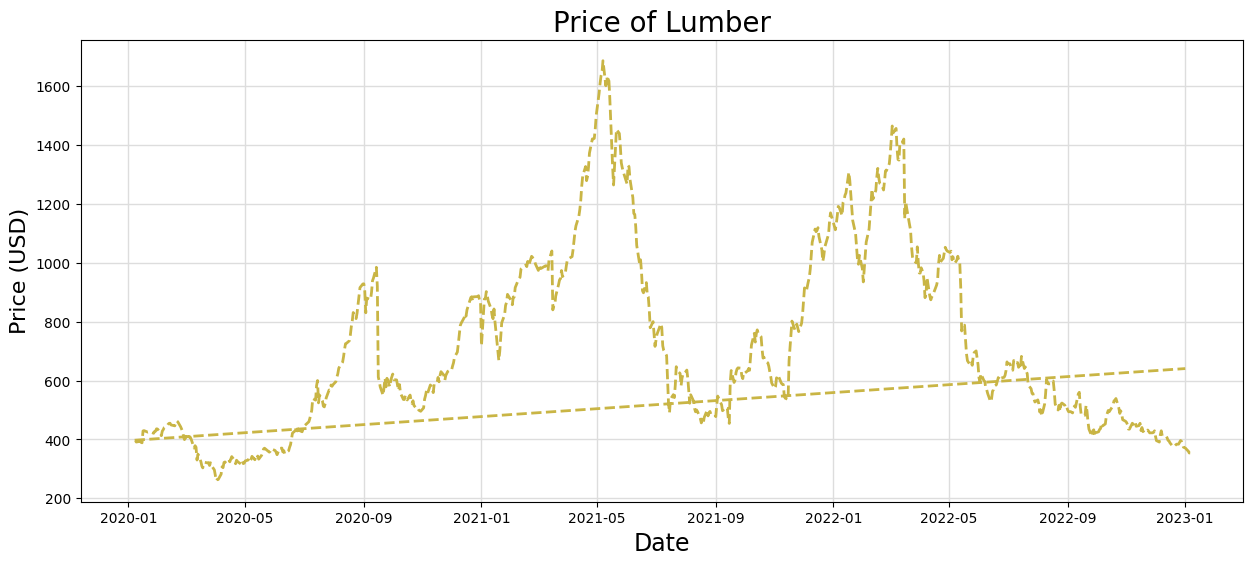

In [118]:
plt.figure(figsize=(15,6))
plt.plot(df_with_prediction['Date'], df_with_prediction['Price'], color='#c9b545',linewidth=2, linestyle='--')
plt.grid(color='#dddddd',linestyle='-',linewidth=1)

plt.title('Price of Lumber', fontsize=20)
plt.xlabel('Date', fontsize=17)
plt.ylabel('Price (USD)',fontsize=16)

plt.show()